<a href="https://colab.research.google.com/github/nsharma73/capstone_haystack/blob/main/Capstone_Project_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - GA Real Estate - Random Forest**

*By Liliya Lopez*

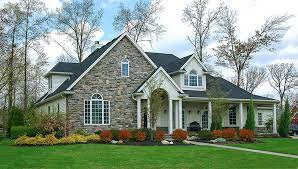

## **1.Introduction**

#####**Libraries used**

In [14]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

##### **Import datasets**

In [15]:
from google.colab import drive

In [16]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
completed_data = pd.read_csv('drive/MyDrive/Colab Notebooks/zillow_schools_tax_dataV2.csv', index_col=0)
pd.set_option('display.max_columns', 20)
completed_data.reset_index(inplace=True)
completed_data.head()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,address,city,state,...,other_crime_total_rate,Prop_Cond_Grp_New,Prop_Cond_Grp_Remodeled,Prop_Cond_Grp_Resale,Two_Car_Garage_0,Two_Car_Garage_1,HasPool_0,HasPool_1,HasHardwood_0,HasHardwood_1
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,101 College Street,Kingsland,Georgia,...,6.365,0,0,1,0,1,1,0,1,0
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,169 School House Creek Drive,Saint Marys,Georgia,...,6.815,0,0,1,1,0,1,0,1,0
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,1621 Sandpiper Court,Saint Marys,Georgia,...,6.815,0,0,1,0,1,1,0,1,0
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,346 Laurel Landing Boulevard,Kingsland,Georgia,...,6.365,0,0,1,1,0,1,0,1,0
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,81 Ossabaw Way,Waverly,Georgia,...,7.125,1,0,0,0,1,1,0,1,0


In [25]:
sum(completed_data.duplicated())

0

In [26]:
completed_data.isnull().sum(axis=0)

rentZestimate                0
zestimate                    0
price_y                      0
PCT_CHG                      0
bathrooms                    0
bedrooms                     0
yearBuilt                    0
address                      0
city                         0
state                        0
zip                          0
latitude                     0
longitude                    0
livingArea                   0
Lot_Size_SqFt                0
Price_SqFt                   0
cap_rate                     0
Tot_Appl                     0
Tot_Comm_Feat                0
Page_Views                   0
Sch_Rat_Avg                  0
Sch_Dist_Avg                 0
sch_cnt                      0
Individuals_taxed            0
Income_per_return            0
Cap_gain                     0
Pension                      0
UE_claims                    0
Social_security              0
SB_income                    0
Student_loan_ded             0
RE_taxes                     0
PP_taxes

## **2.Random Forest**

In [28]:
num_features = completed_data.select_dtypes(include=['int64','float64'])
num_features.columns

Index(['rentZestimate', 'zestimate', 'price_y', 'PCT_CHG', 'bathrooms',
       'bedrooms', 'yearBuilt', 'zip', 'latitude', 'longitude', 'livingArea',
       'Lot_Size_SqFt', 'Price_SqFt', 'cap_rate', 'Tot_Appl', 'Tot_Comm_Feat',
       'Page_Views', 'Sch_Rat_Avg', 'Sch_Dist_Avg', 'sch_cnt',
       'Individuals_taxed', 'Income_per_return', 'Cap_gain', 'Pension',
       'UE_claims', 'Social_security', 'SB_income', 'Student_loan_ded',
       'RE_taxes', 'PP_taxes', 'Child_credit', 'Earned_Inc_credit',
       'violent_crime_total_rate', 'property_crime_total_rate',
       'other_crime_total_rate', 'Prop_Cond_Grp_New',
       'Prop_Cond_Grp_Remodeled', 'Prop_Cond_Grp_Resale', 'Two_Car_Garage_0',
       'Two_Car_Garage_1', 'HasPool_0', 'HasPool_1', 'HasHardwood_0',
       'HasHardwood_1'],
      dtype='object')

In [29]:
numerical_features = num_features.drop(['rentZestimate', 'zestimate', 'price_y'], axis =1)
numerical_features.columns

Index(['PCT_CHG', 'bathrooms', 'bedrooms', 'yearBuilt', 'zip', 'latitude',
       'longitude', 'livingArea', 'Lot_Size_SqFt', 'Price_SqFt', 'cap_rate',
       'Tot_Appl', 'Tot_Comm_Feat', 'Page_Views', 'Sch_Rat_Avg',
       'Sch_Dist_Avg', 'sch_cnt', 'Individuals_taxed', 'Income_per_return',
       'Cap_gain', 'Pension', 'UE_claims', 'Social_security', 'SB_income',
       'Student_loan_ded', 'RE_taxes', 'PP_taxes', 'Child_credit',
       'Earned_Inc_credit', 'violent_crime_total_rate',
       'property_crime_total_rate', 'other_crime_total_rate',
       'Prop_Cond_Grp_New', 'Prop_Cond_Grp_Remodeled', 'Prop_Cond_Grp_Resale',
       'Two_Car_Garage_0', 'Two_Car_Garage_1', 'HasPool_0', 'HasPool_1',
       'HasHardwood_0', 'HasHardwood_1'],
      dtype='object')

In [30]:
price = num_features.zestimate

In [31]:
X_train, X_test, y_train, y_test = train_test_split(numerical_features, price, test_size=0.25, random_state=12)

In [32]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
rf.feature_importances_

array([8.36381453e-03, 4.20380048e-03, 3.43063308e-03, 2.26029964e-02,
       6.68579928e-03, 1.10350308e-02, 8.59357420e-03, 3.71542647e-01,
       1.33649512e-02, 2.44678325e-01, 9.62267301e-02, 1.22693949e-02,
       1.06136328e-02, 2.50298066e-02, 7.66249309e-03, 9.62426275e-03,
       1.94708129e-03, 7.92304095e-03, 2.41768491e-02, 5.82575057e-03,
       4.93133442e-03, 7.41984820e-03, 1.97727607e-02, 5.57092700e-03,
       5.90618566e-03, 1.41228545e-02, 5.39185660e-03, 6.57630103e-03,
       9.34463533e-03, 5.79948162e-03, 6.64437977e-03, 5.54637761e-03,
       2.86695476e-04, 4.46620057e-04, 6.62765151e-04, 9.16136181e-04,
       1.38392917e-03, 6.12052661e-05, 3.74303566e-05, 1.70217532e-03,
       1.67548619e-03])

Text(0.5, 0, 'Random Forest Feature Importance')

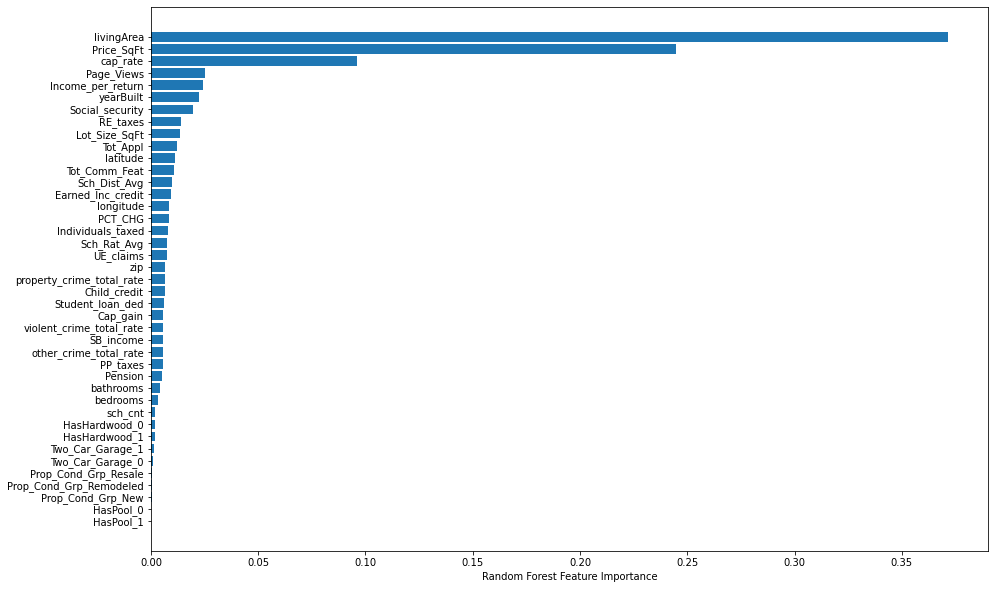

In [35]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(15, 10))
plt.barh(numerical_features.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")